Simular un conjunto de datos de tamaño 𝑛 =10 a partir de una distribución normal con 𝜃 =5
y 𝜎 =1. Graficar la likelihood. Usar el prior 𝜃 ∼ N(0, 0.5) y calcular la distribución posterior de
𝜃. Graficar las distribuciones prior y posterior.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
def simulate_posterior(theta, sigma, x):
    #samples = np.random.beta(a + y, b + n - y, size=num_samples)
    samples = norm.pdf(x, loc= theta, scale= sigma)

    return samples

In [40]:
n = 10
theta = 5
sigma  = 1

# Genero los datos
datos = np.random.normal(loc=theta, scale=sigma, size=n)
y_mean = np.mean(datos)

theta_values = np.linspace(-3, 10, 500)
# prior (normal) -> exp[-(theta - mu)**2 / (2 * tau**2)]
# prior y likelihood son normales, por lo que la posterior es normal
mu_0 = 0
tau_0 = 0.5

prior = norm.pdf(theta_values, loc=mu_0, scale=tau_0)

#likelihood (normal) -> exp[-(x - theta)**2 / (2 * sigma**2)]
likelihood = norm.pdf(theta_values, loc=theta, scale=sigma)

# posterior (normal) 
# Aplico formulas
tau_n = 1 / (1/tau_0**2 + n/sigma**2)
mu_n = tau_n * (mu_0 / tau_0**2 + (n * y_mean)/sigma**2)

posterior = norm.pdf(theta_values, loc=mu_n, scale=np.sqrt(tau_n)) #con o sin raiz?


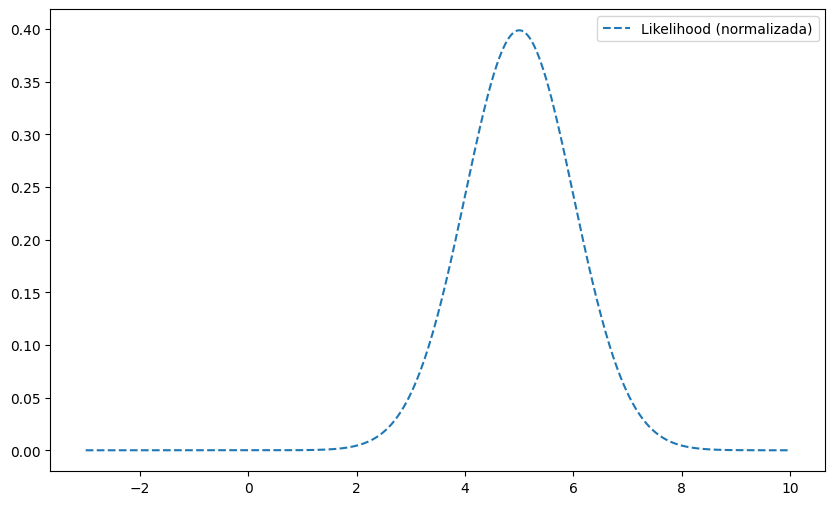

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(theta_values, likelihood, label='Likelihood (normalizada)', linestyle='--')
plt.legend()

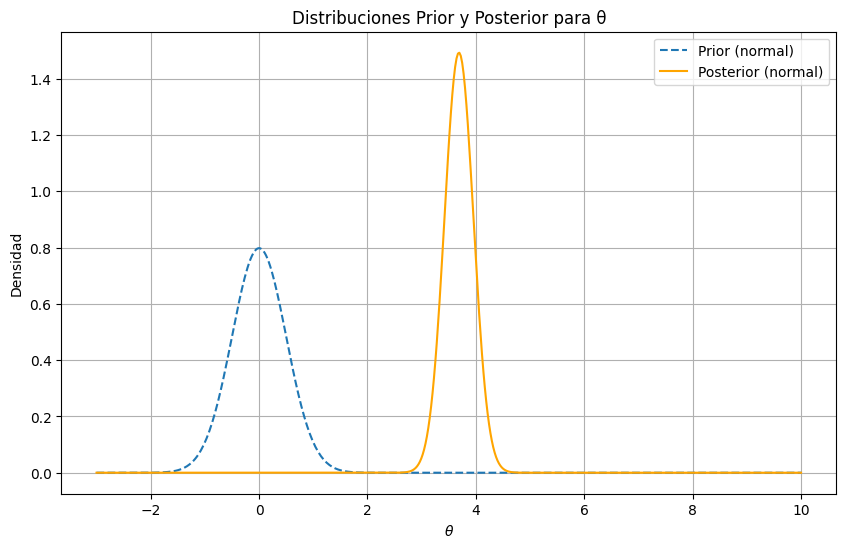

In [42]:
'''
mu_n = ( (mu_0 / tau_0**2) + (n * y_mean / sigma**2) ) / (1 / tau_0**2 + n / sigma**2)
tau_n_2 = ( (1 / tau_0**2) + (n / sigma**2))**-1
'''

# Graficar posterior
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(theta_values, prior, label='Prior (normal)', linestyle='--')
ax.plot(theta_values, posterior, label='Posterior (normal)', color='orange')
plt.legend()
plt.title("Distribuciones Prior y Posterior para θ")
plt.xlabel(r"$\theta$")
plt.ylabel("Densidad")
plt.grid()
plt.show()


#posterior_samples = simulate_posterior(theta, sigma, x)